## conn CCIAA Macerata

In [74]:
url = 'https://opendata.marche.camcom.it/json-browser.htm?dse=nama_10r_3gdp?lang=en&geo=IT&geo=ITF1&geo=ITF11&geo=ITF12&geo=ITF13&geo=ITF14&geo=ITF5&geo=ITF51&geo=ITF52&geo=ITF6&geo=ITF61&geo=ITF62&geo=ITF63&geo=ITF64&geo=ITF65&geo=ITF3&geo=ITF31&geo=ITF32&geo=ITF33&geo=ITF34&geo=ITF35&geo=ITH5&geo=ITH51&geo=ITH52&geo=ITH53&geo=ITH54&geo=ITH55&geo=ITH56&geo=ITH57&geo=ITH58&geo=ITH59&geo=ITH4&geo=ITH41&geo=ITH42&geo=ITH43&geo=ITH44&geo=ITI4&geo=ITI41&geo=ITI42&geo=ITI43&geo=ITI44&geo=ITI45&geo=ITC3&geo=ITC31&geo=ITC32&geo=ITC33&geo=ITC34&geo=ITC4&geo=ITC41&geo=ITC42&geo=ITC43&geo=ITC44&geo=ITC45&geo=ITC46&geo=ITC47&geo=ITC48&geo=ITC49&geo=ITC4A&geo=ITC4B&geo=ITC4C&geo=ITC4D&geo=ITI3&geo=ITI31&geo=ITI32&geo=ITI33&geo=ITI34&geo=ITI35&geo=ITF2&geo=ITF21&geo=ITF22&geo=ITC1&geo=ITC11&geo=ITC12&geo=ITC13&geo=ITC14&geo=ITC15&geo=ITC16&geo=ITC17&geo=ITC18&geo=ITF4&geo=ITF41&geo=ITF42&geo=ITF43&geo=ITF44&geo=ITF45&geo=ITF46&geo=ITF47&geo=ITF48&geo=ITG2&geo=ITG21&geo=ITG22&geo=ITG23&geo=ITG24&geo=ITG25&geo=ITG26&geo=ITG27&geo=ITG28&geo=ITG29&geo=ITG2A&geo=ITG2B&geo=ITG2C&geo=ITG1&geo=ITG11&geo=ITG12&geo=ITG13&geo=ITG14&geo=ITG15&geo=ITG16&geo=ITG17&geo=ITG18&geo=ITG19&geo=ITI1&geo=ITI11&geo=ITI12&geo=ITI13&geo=ITI14&geo=ITI15&geo=ITI16&geo=ITI17&geo=ITI18&geo=ITI19&geo=ITI1A&geo=ITH1&geo=ITH2&geo=ITC2&geo=ITH3&geo=ITH31&geo=ITH32&geo=ITH33&geo=ITH34&geo=ITH35&geo=ITH36&geo=ITH37&geo=ITI2&geo=ITI21&geo=ITI22&lastTimePeriod=12#'

## con Eurostat

In [14]:
import pandas as pd
import requests
from io import BytesIO

# === 1. Scarica il file Eurostat SDMX-CSV compresso ===
url = "https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/tgs00003?format=SDMX-CSV&compressed=true"
response = requests.get(url)
response.raise_for_status()

# === 2. Leggi il file direttamente da memoria
df = pd.read_csv(BytesIO(response.content), compression='gzip')

# === 3. Converte OBS_VALUE e filtra unità e frequenza
df['OBS_VALUE'] = pd.to_numeric(df['OBS_VALUE'], errors='coerce')
df_gdp = df[
    (df['unit'] == 'MIO_EUR') &
    (df['freq'] == 'A')
].copy()

# === 4. Ordina e salva
df_gdp = df_gdp.sort_values(by=['geo', 'TIME_PERIOD'])
df_gdp.to_csv("gdp_province_nuts3_eurostat.csv", index=False)

# ✅ Anteprima
print(df_gdp.head())


              DATAFLOW        LAST UPDATE freq  ... OBS_VALUE OBS_FLAG  CONF_STATUS
0  ESTAT:TGS00003(1.0)  18/03/25 23:00:00    A  ...   2297.46      NaN          NaN
1  ESTAT:TGS00003(1.0)  18/03/25 23:00:00    A  ...   2276.67      NaN          NaN
2  ESTAT:TGS00003(1.0)  18/03/25 23:00:00    A  ...   2290.45      NaN          NaN
3  ESTAT:TGS00003(1.0)  18/03/25 23:00:00    A  ...   2418.75      NaN          NaN
4  ESTAT:TGS00003(1.0)  18/03/25 23:00:00    A  ...   2549.18      NaN          NaN

[5 rows x 9 columns]


In [15]:
df_gdp

,DATAFLOW,LAST UPDATE,freq,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:TGS00003(1.0),18/03/25 23:00:00,A,MIO_EUR,AL01,2012,2297.46,NaN,NaN
1,ESTAT:TGS00003(1.0),18/03/25 23:00:00,A,MIO_EUR,AL01,2013,2276.67,NaN,NaN
2,ESTAT:TGS00003(1.0),18/03/25 23:00:00,A,MIO_EUR,AL01,2014,2290.45,NaN,NaN
3,ESTAT:TGS00003(1.0),18/03/25 23:00:00,A,MIO_EUR,AL01,2015,2418.75,NaN,NaN
4,ESTAT:TGS00003(1.0),18/03/25 23:00:00,A,MIO_EUR,AL01,2016,2549.18,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3622,ESTAT:TGS00003(1.0),18/03/25 23:00:00,A,MIO_EUR,TRC3,2019,9668.48,NaN,NaN
3623,ESTAT:TGS00003(1.0),18/03/25 23:00:00,A,MIO_EUR,TRC3,2020,9276.31,NaN,NaN
3624,ESTAT:TGS00003(1.0),18/03/25 23:00:00,A,MIO_EUR,TRC3,2021,9764.30,NaN,NaN
3625,ESTAT:TGS00003(1.0),18/03/25 23:00:00,A,MIO_EUR,TRC3,2022,12374.91,NaN,NaN


In [17]:
nuts3_italia = {
    'ITC11': 'Torino',
    'ITC12': 'Vercelli',
    'ITC13': 'Biella',
    'ITC14': 'Verbano-Cusio-Ossola',
    'ITC15': 'Novara',
    'ITC16': 'Cuneo',
    'ITC17': 'Asti',
    'ITC18': 'Alessandria',
    'ITC20': 'Valle d’Aosta / Vallée d’Aoste',
    'ITC31': 'Imperia',
    'ITC32': 'Savona',
    'ITC33': 'Genova',
    'ITC34': 'La Spezia',
    'ITC41': 'Varese',
    'ITC42': 'Como',
    'ITC43': 'Lecco',
    'ITC44': 'Sondrio',
    'ITC45': 'Milano',
    'ITC46': 'Bergamo',
    'ITC47': 'Brescia',
    'ITC48': 'Pavia',
    'ITC49': 'Lodi',
    'ITC4A': 'Cremona',
    'ITC4B': 'Mantova',
    'ITD10': 'Bolzano / Bozen',
    'ITD20': 'Trento',
    'ITD31': 'Verona',
    'ITD32': 'Vicenza',
    'ITD33': 'Belluno',
    'ITD34': 'Treviso',
    'ITD35': 'Venezia',
    'ITD36': 'Padova',
    'ITD37': 'Rovigo',
    'ITD41': 'Pordenone',
    'ITD42': 'Udine',
    'ITD43': 'Gorizia',
    'ITD44': 'Trieste',
    'ITE11': 'Piacenza',
    'ITE12': 'Parma',
    'ITE13': 'Reggio nell’Emilia',
    'ITE14': 'Modena',
    'ITE15': 'Bologna',
    'ITE16': 'Ferrara',
    'ITE17': 'Ravenna',
    'ITE18': 'Forlì-Cesena',
    'ITE19': 'Rimini',
    'ITE21': 'Massa-Carrara',
    'ITE22': 'Lucca',
    'ITE23': 'Pistoia',
    'ITE24': 'Firenze',
    'ITE25': 'Prato',
    'ITE26': 'Livorno',
    'ITE27': 'Pisa',
    'ITE28': 'Arezzo',
    'ITE29': 'Siena',
    'ITE2A': 'Grosseto',
    'ITE31': 'Perugia',
    'ITE32': 'Terni',
    'ITE41': 'Pesaro e Urbino',
    'ITE42': 'Ancona',
    'ITE43': 'Macerata',
    'ITE44': 'Ascoli Piceno',
    'ITE45': 'Fermo',
    'ITE51': 'Viterbo',
    'ITE52': 'Rieti',
    'ITE53': 'Roma',
    'ITE54': 'Latina',
    'ITE55': 'Frosinone',
    'ITF11': 'L’Aquila',
    'ITF12': 'Teramo',
    'ITF13': 'Pescara',
    'ITF14': 'Chieti',
    'ITF21': 'Isernia',
    'ITF22': 'Campobasso',
    'ITF31': 'Caserta',
    'ITF32': 'Benevento',
    'ITF33': 'Napoli',
    'ITF34': 'Avellino',
    'ITF35': 'Salerno',
    'ITF43': 'Foggia',
    'ITF44': 'Bari',
    'ITF45': 'Taranto',
    'ITF46': 'Brindisi',
    'ITF47': 'Lecce',
    'ITG11': 'Potenza',
    'ITG12': 'Matera',
    'ITG13': 'Cosenza',
    'ITG14': 'Crotone',
    'ITG15': 'Catanzaro',
    'ITG16': 'Vibo Valentia',
    'ITG17': 'Reggio di Calabria',
    'ITG18': 'Trapani',
    'ITG19': 'Palermo',
    'ITG1A': 'Messina',
    'ITG1B': 'Agrigento',
    'ITG1C': 'Caltanissetta',
    'ITG1D': 'Enna',
    'ITG1E': 'Catania',
    'ITG1F': 'Ragusa',
    'ITG1G': 'Siracusa',
    'ITG2F': 'Sassari',
    'ITG2G': 'Nuoro',
    'ITG2H': 'Cagliari',
    'ITG2I': 'Oristano',
    'ITG2J': 'Sud Sardegna'
}


In [19]:
nuts2_italia = {
    'ITC1': 'Piemonte',
    'ITC2': "Valle d'Aosta",
    'ITC3': 'Liguria',
    'ITC4': 'Lombardia',
    'ITD1': 'Provincia Autonoma di Bolzano',
    'ITD2': 'Provincia Autonoma di Trento',
    'ITD3': 'Veneto',
    'ITD4': 'Friuli-Venezia Giulia',
    'ITE1': 'Emilia-Romagna',
    'ITE2': 'Toscana',
    'ITE3': 'Umbria',
    'ITE4': 'Marche',
    'ITE5': 'Lazio',
    'ITF1': 'Abruzzo',
    'ITF2': 'Molise',
    'ITF3': 'Campania',
    'ITF4': 'Puglia',
    'ITF5': 'Basilicata',
    'ITF6': 'Calabria',
    'ITG1': 'Sicilia',
    'ITG2': 'Sardegna'
}


In [16]:
import pandas as pd
import requests
from io import BytesIO

# === 1. Scarica il file SDMX-CSV compresso ===
url = "https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/tgs00003?format=SDMX-CSV&compressed=true"
response = requests.get(url)
response.raise_for_status()

# === 2. Leggi direttamente da memoria
df = pd.read_csv(BytesIO(response.content), compression='gzip')

# === 3. Pulizia e filtraggio
df['OBS_VALUE'] = pd.to_numeric(df['OBS_VALUE'], errors='coerce')

# Filtra solo Italia: geo che iniziano per 'IT'
df_italia = df[
    (df['unit'] == 'MIO_EUR') &
    (df['freq'] == 'A') &
    (df['geo'].str.startswith('IT'))
].copy()

# === 4. Pivot: righe = geo, colonne = anni, celle = OBS_VALUE
df_pivot = df_italia.pivot(index='geo', columns='TIME_PERIOD', values='OBS_VALUE')

# === 5. Ordina colonne e salva
df_pivot = df_pivot.sort_index(axis=1)
df_pivot.to_csv("gdp_nuts3_italia_pivot.csv")

# ✅ Anteprima
print(df_pivot.head())


TIME_PERIOD       2012       2013       2014  ...       2021       2022       2023
geo                                           ...                                 
ITC1         123364.91  124536.96  124277.62  ...  137532.17  146618.08  155971.77
ITC2           4879.29    4680.43    4643.64  ...    4788.34    5416.03    5697.75
ITC3          46307.27   45756.25   46573.51  ...   49519.36   53347.56   57304.27
ITC4         351389.95  348117.43  355346.81  ...  423767.66  457232.64  490132.10
ITF1          32213.29   31695.39   31656.84  ...   33654.56   36434.16   39428.03

[5 rows x 12 columns]


In [18]:
# Aggiunge colonna col nome della provincia
df_pivot['provincia'] = df_pivot.index.map(nuts3_italia)

# Riordina le colonne: prima provincia, poi anni
colonne = ['provincia'] + [col for col in df_pivot.columns if col != 'provincia']
df_pivot = df_pivot[colonne]

# Salva in CSV
df_pivot.to_csv("gdp_nuts3_italia_pivot_nomi.csv", index_label='geo')

# Visualizza
(df_pivot.head())

TIME_PERIOD,provincia,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
geo,,,,,,,,,,,,,
ITC1,NaN,123364.91,124536.96,124277.62,126868.33,130070.95,134450.31,137202.41,137773.32,126659.44,137532.17,146618.08,155971.77
ITC2,NaN,4879.29,4680.43,4643.64,4653.42,4610.66,4776.15,4823.93,4860.99,4458.79,4788.34,5416.03,5697.75
ITC3,NaN,46307.27,45756.25,46573.51,47179.51,48068.02,49129.73,49293.35,50105.22,45221.63,49519.36,53347.56,57304.27
ITC4,NaN,351389.95,348117.43,355346.81,362329.59,373037.53,383032.58,393500.34,397959.74,372986.08,423767.66,457232.64,490132.10
ITF1,NaN,32213.29,31695.39,31656.84,31863.76,31954.43,32809.52,32969.03,33169.52,30577.05,33654.56,36434.16,39428.03


In [21]:
# Mappa i nomi delle regioni (NUTS2)
df_pivot['regione'] = df_pivot.index.map(nuts2_italia)

# Riordina colonne: prima la regione, poi gli anni
colonne = ['regione'] + [col for col in df_pivot.columns if col != 'regione' and col != 'TIME_PERIOD']
df_pivot = df_pivot[colonne]

# Salva in CSV
df_pivot.to_csv("gdp_nuts2_italia_pivot_con_nomi.csv", index_label='geo')

# Mostra anteprima
(df_pivot.head())


TIME_PERIOD,regione,provincia,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
geo,,,,,,,,,,,,,,
ITC1,Piemonte,NaN,123364.91,124536.96,124277.62,126868.33,130070.95,134450.31,137202.41,137773.32,126659.44,137532.17,146618.08,155971.77
ITC2,Valle d'Aosta,NaN,4879.29,4680.43,4643.64,4653.42,4610.66,4776.15,4823.93,4860.99,4458.79,4788.34,5416.03,5697.75
ITC3,Liguria,NaN,46307.27,45756.25,46573.51,47179.51,48068.02,49129.73,49293.35,50105.22,45221.63,49519.36,53347.56,57304.27
ITC4,Lombardia,NaN,351389.95,348117.43,355346.81,362329.59,373037.53,383032.58,393500.34,397959.74,372986.08,423767.66,457232.64,490132.10
ITF1,Abruzzo,NaN,32213.29,31695.39,31656.84,31863.76,31954.43,32809.52,32969.03,33169.52,30577.05,33654.56,36434.16,39428.03


### confrontare Centro + Nord con il Sud

In [26]:
nord_centro = ['ITC1', 'ITC2', 'ITC3', 'ITC4']
sud_isole   = ['ITF1', 'ITF2', 'ITF3', 'ITF4', 'ITF5', 'ITF6', 'ITG1', 'ITG2']



In [27]:
# Step 1: seleziona solo le colonne anno (ignora 'regione')
col_anni = [col for col in df_pivot.columns if str(col).isnumeric()]

# Step 2: somma PIL per ciascun gruppo
centro_nord = df_pivot.loc[nord_centro, col_anni].sum()
sud = df_pivot.loc[sud_isole, col_anni].sum()

# Step 3: crea DataFrame confronto
df_confronto = pd.DataFrame({
    'Centro_Nord': centro_nord.astype(float),
    'Sud_Isole': sud.astype(float)
})
df_confronto['Sud_vs_CentroNord_%'] = df_confronto['Sud_Isole'] / df_confronto['Centro_Nord'] * 100

# Step 4: visualizza
print(df_confronto)



             Centro_Nord  Sud_Isole  Sud_vs_CentroNord_%
TIME_PERIOD                                             
2012           525941.42  379039.79            72.068823
2013           523091.07  371959.91            71.108060
2014           530841.58  370278.96            69.753195
2015           541030.85  378466.55            69.952859
2016           555787.16  382444.49            68.811322
2017           571388.77  389994.25            68.253748
2018           584820.03  394595.10            67.472911
2019           590699.27  399463.29            67.625492
2020           549325.94  371290.88            67.590269
2021           615607.53  407279.95            66.159027
2022           662614.31  443738.43            66.967831
2023           709105.89  474320.74            66.889973


             Centro_Nord  Sud_Isole  CentroNord_IDX  Sud_IDX
TIME_PERIOD                                                 
2012           525941.42  379039.79          100.00   100.00
2013           523091.07  371959.91           99.46    98.13
2014           530841.58  370278.96          100.93    97.69
2015           541030.85  378466.55          102.87    99.85
2016           555787.16  382444.49          105.67   100.90
2017           571388.77  389994.25          108.64   102.89
2018           584820.03  394595.10          111.19   104.10
2019           590699.27  399463.29          112.31   105.39
2020           549325.94  371290.88          104.45    97.96
2021           615607.53  407279.95          117.05   107.45
2022           662614.31  443738.43          125.99   117.07
2023           709105.89  474320.74          134.83   125.14


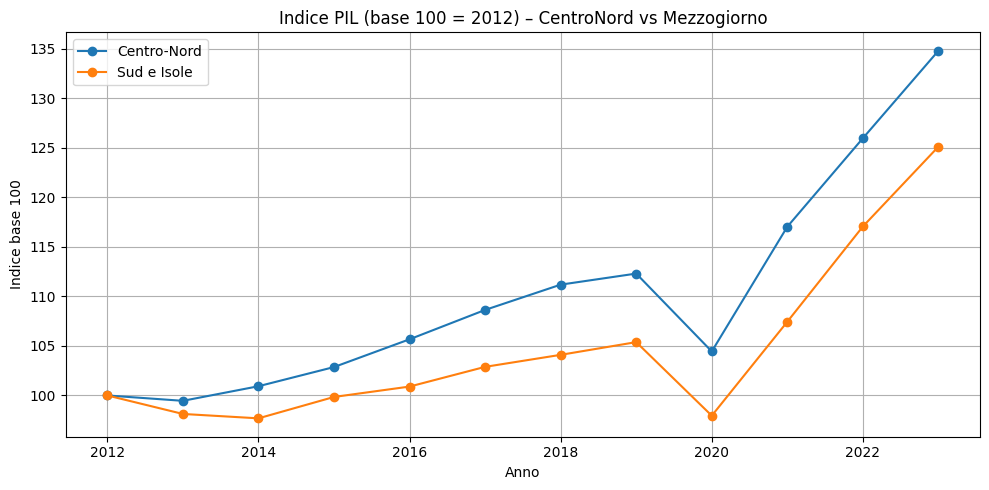

In [75]:
import pandas as pd

# === Supponiamo di avere già df_pivot ===
# - Index: codici NUTS2 (es. ITC1, ITF4, ...)
# - Colonne: anni (stringhe, es. '2012', ..., '2023')

# === Definisci le macroaree coerenti col pivot ===
nord_centro = ['ITC1', 'ITC2', 'ITC3', 'ITC4']  # Nord Ovest + Lombardia
sud_isole = ['ITF1', 'ITF2', 'ITF3', 'ITF4', 'ITF5', 'ITF6', 'ITG1', 'ITG2']

# === Estrai solo le colonne con anni
col_anni = [col for col in df_pivot.columns if str(col).isnumeric()]

# === Somma PIL per ciascuna macroarea per anno
centro_nord = df_pivot.loc[nord_centro, col_anni].sum()
sud = df_pivot.loc[sud_isole, col_anni].sum()

# === Crea DataFrame confronto PIL
df_confronto = pd.DataFrame({
    'Centro_Nord': centro_nord.astype(float),
    'Sud_Isole': sud.astype(float)
})

# Converti indice se serve
if df_confronto.index.dtype != 'int64':
    df_confronto.index = df_confronto.index.astype(int)

# Calcola base 100
base_2012 = df_confronto.loc[2012]
df_confronto['CentroNord_IDX'] = df_confronto['Centro_Nord'] / base_2012['Centro_Nord'] * 100
df_confronto['Sud_IDX'] = df_confronto['Sud_Isole'] / base_2012['Sud_Isole'] * 100


# === Output finale
print(df_confronto.round(2))

# === (Opzionale) Plot
import matplotlib.pyplot as plt

df_confronto[['CentroNord_IDX', 'Sud_IDX']].plot(marker='o', figsize=(10, 5))
plt.title("Indice PIL (base 100 = 2012) – CentroNord vs Mezzogiorno")
plt.ylabel("Indice base 100")
plt.xlabel("Anno")
plt.grid(True)
plt.legend(["Centro-Nord", "Sud e Isole"])
plt.tight_layout()
plt.show()


             Centro_Nord  Sud_Isole  CentroNord_IDX  Sud_IDX
TIME_PERIOD                                                 
2012           525941.42  379039.79           89.04    94.89
2013           523091.07  371959.91           88.55    93.11
2014           530841.58  370278.96           89.87    92.69
2015           541030.85  378466.55           91.59    94.74
2016           555787.16  382444.49           94.09    95.74
2017           571388.77  389994.25           96.73    97.63
2018           584820.03  394595.10           99.00    98.78
2019           590699.27  399463.29          100.00   100.00
2020           549325.94  371290.88           93.00    92.95
2021           615607.53  407279.95          104.22   101.96
2022           662614.31  443738.43          112.17   111.08
2023           709105.89  474320.74          120.05   118.74


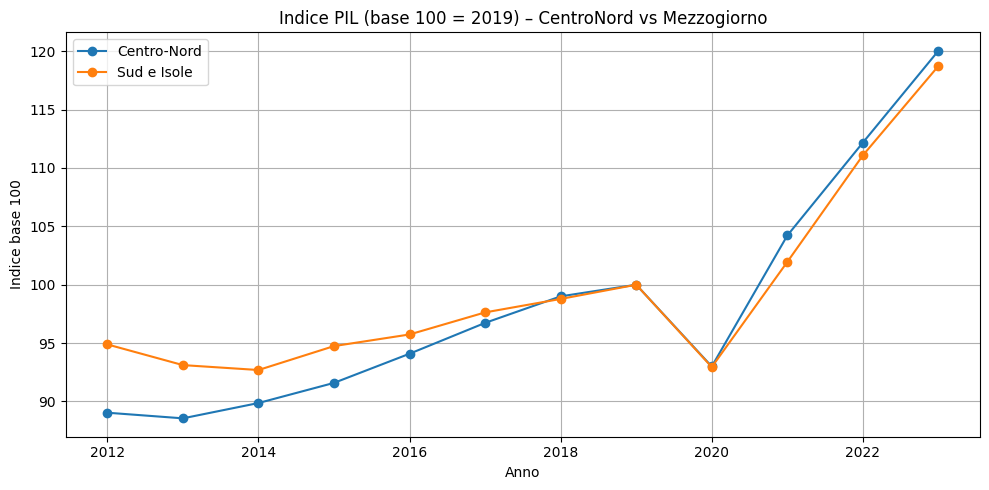

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# === Supponiamo di avere già df_pivot ===
# - Index: codici NUTS2 (es. ITC1, ITF4, ...)
# - Colonne: anni (stringhe, es. '2012', ..., '2023')

# === Definisci le macroaree coerenti col pivot ===
nord_centro = ['ITC1', 'ITC2', 'ITC3', 'ITC4']  # Nord Ovest + Lombardia
sud_isole = ['ITF1', 'ITF2', 'ITF3', 'ITF4', 'ITF5', 'ITF6', 'ITG1', 'ITG2']

# === Estrai solo le colonne con anni
col_anni = [col for col in df_pivot.columns if str(col).isnumeric()]

# === Somma PIL per ciascuna macroarea per anno
centro_nord = df_pivot.loc[nord_centro, col_anni].sum()
sud = df_pivot.loc[sud_isole, col_anni].sum()

# === Crea DataFrame confronto PIL
df_confronto = pd.DataFrame({
    'Centro_Nord': centro_nord.astype(float),
    'Sud_Isole': sud.astype(float)
})

# Assicura che l’indice sia numerico (anno)
df_confronto.index = df_confronto.index.astype(int)

# === Calcola indice base 100 rispetto al 2019
base_2019 = df_confronto.loc[2019]
df_confronto['CentroNord_IDX'] = df_confronto['Centro_Nord'] / base_2019['Centro_Nord'] * 100
df_confronto['Sud_IDX'] = df_confronto['Sud_Isole'] / base_2019['Sud_Isole'] * 100

# === Output
print(df_confronto.round(2))

# === Plot
df_confronto[['CentroNord_IDX', 'Sud_IDX']].plot(marker='o', figsize=(10, 5))
plt.title("Indice PIL (base 100 = 2019) – CentroNord vs Mezzogiorno")
plt.ylabel("Indice base 100")
plt.xlabel("Anno")
plt.grid(True)
plt.legend(["Centro-Nord", "Sud e Isole"])
plt.tight_layout()
plt.show()


### confronto della variazione 2019–2023

In [50]:
df_confronto['CentroNord_var19_23_%'] = (
    df_confronto['Centro_Nord'].loc[2023] / df_confronto['Centro_Nord'].loc[2019] - 1
) * 100

df_confronto['Sud_var19_23_%'] = (
    df_confronto['Sud_Isole'].loc[2023] / df_confronto['Sud_Isole'].loc[2019] - 1
) * 100


In [51]:
var_centro_nord = df_confronto['CentroNord_var19_23_%'].iloc[0]
var_sud = df_confronto['Sud_var19_23_%'].iloc[0]

print(f"📈 Variazione PIL 2019–2023:")
print(f"Centro-Nord: {var_centro_nord:.2f}%")
print(f"Sud-Isole:  {var_sud:.2f}%")


📈 Variazione PIL 2019–2023:
Centro-Nord: 20.05%
Sud-Isole:  18.74%


il PIL del Sud è aumentato ma meno rapidamente rispetto al Centro-Nord, anche se:

la distanza relativa si è ridotta in alcuni anni post-pandemia (es. 2020–2021)

la dinamica convergente può emergere solo se proseguita per più anni

🔍 Attenzione però:
Questa è la variazione assoluta del PIL in euro, non PIL pro capite né indice di sviluppo. Potrebbero esserci dinamiche demografiche diverse:

il Sud perde abitanti, quindi a parità di PIL cresce di più pro capite

il Centro-Nord attrae popolazione, quindi il PIL cresce anche per effetto demografico

             Centro_Nord  Sud_Isole  CentroNord_IDX  Sud_IDX
TIME_PERIOD                                                 
2019                0.02       0.01          100.00   100.00
2020                0.02       0.01           93.05    93.53
2021                0.02       0.01          104.87   103.79
2022                0.02       0.01          113.35   113.25
2023                0.02       0.01          121.10   121.52


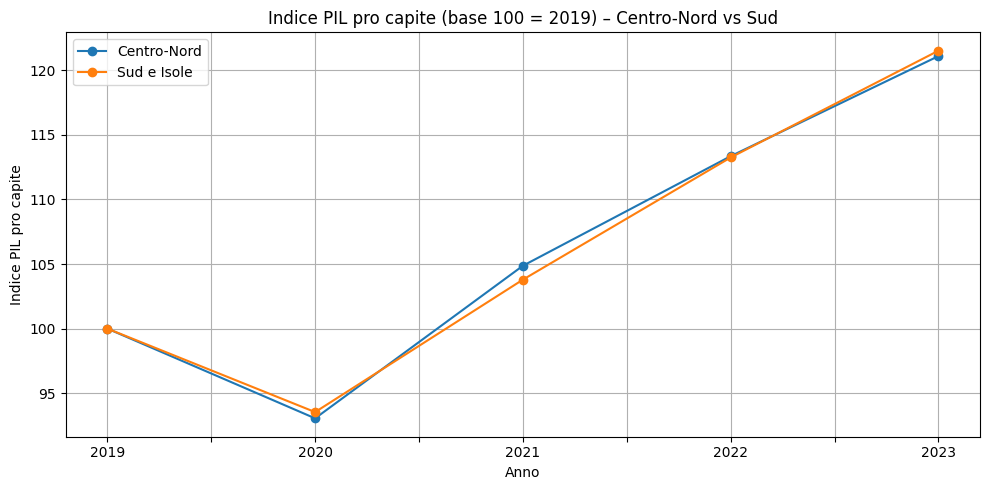

In [72]:
import pandas as pd
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# === STEP 1: Scarica popolazione NUTS2 ITALIA da Eurostat (dataset demo_r_pjanaggr3) ===
pop_url = "https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/demo_r_pjanaggr3?format=SDMX-CSV&compressed=true"
r = requests.get(pop_url)
r.raise_for_status()

# === STEP 2: Leggi il file .csv.gz da memoria
df_pop = pd.read_csv(BytesIO(r.content), compression='gzip')

# === STEP 3: Filtra solo Italia, popolazione al 1° gennaio (unit = NR, sex = T, age = TOTAL)
df_pop = df_pop[
    (df_pop['geo'].str.startswith('IT')) &
    (df_pop['unit'] == 'NR') &
    (df_pop['sex'] == 'T') &
    (df_pop['age'] == 'TOTAL')
]

# === STEP 4: Pivot e gestione colonne
df_pop['TIME_PERIOD'] = df_pop['TIME_PERIOD'].astype(str)
df_pop_wide = df_pop.pivot(index='geo', columns='TIME_PERIOD', values='OBS_VALUE')
df_pop_wide.columns = df_pop_wide.columns.astype(str)

# Anni target e validazione
anni_target = ['2019', '2020', '2021', '2022', '2023']
anni_presenti = [a for a in anni_target if a in df_pop_wide.columns]
if len(anni_presenti) < len(anni_target):
    print("⚠️ Attenzione: anni mancanti nel dataset popolazione:", set(anni_target) - set(anni_presenti))

df_pop_wide = df_pop_wide[anni_presenti].astype(float)

# === STEP 5: Definisci le macroaree
nord_centro_prefix = ('ITC1', 'ITC2', 'ITC3', 'ITC4')
sud_isole_prefix = ('ITF1', 'ITF2', 'ITF3', 'ITF4', 'ITF5', 'ITF6', 'ITG1', 'ITG2')

# === STEP 6: Somma popolazione per macroarea
pop_cn = df_pop_wide[df_pop_wide.index.str.startswith(nord_centro_prefix)].sum()
pop_sud = df_pop_wide[df_pop_wide.index.str.startswith(sud_isole_prefix)].sum()

# === STEP 7: Calcola PIL totale per macroarea (df_pivot deve esistere già)
df_pivot.columns = df_pivot.columns.astype(str)
col_anni = anni_presenti

pil_cn = df_pivot[df_pivot.index.str.startswith(nord_centro_prefix)][col_anni].astype(float).sum()
pil_sud = df_pivot[df_pivot.index.str.startswith(sud_isole_prefix)][col_anni].astype(float).sum()

# === STEP 8: Calcola PIL pro capite
gdp_capita = pd.DataFrame({
    'Centro_Nord': pil_cn / pop_cn,
    'Sud_Isole': pil_sud / pop_sud
})

# === STEP 9: Calcola indice base 100 (base 2019)
base_2019 = gdp_capita.loc['2019']
gdp_capita['CentroNord_IDX'] = gdp_capita['Centro_Nord'] / base_2019['Centro_Nord'] * 100
gdp_capita['Sud_IDX'] = gdp_capita['Sud_Isole'] / base_2019['Sud_Isole'] * 100

# === STEP 10: Output
print(gdp_capita.round(2))

# === STEP 11: Grafico
gdp_capita[['CentroNord_IDX', 'Sud_IDX']].plot(marker='o', figsize=(10, 5))
plt.title("Indice PIL pro capite (base 100 = 2019) – Centro-Nord vs Sud")
plt.ylabel("Indice PIL pro capite")
plt.xlabel("Anno")
plt.grid(True)
plt.legend(["Centro-Nord", "Sud e Isole"])
plt.tight_layout()
plt.show()

# === STEP 12: (Facoltativo) Salva in CSV
gdp_capita.round(2).to_csv("indice_pil_pro_capite_macroaree_2019_2023.csv", index_label='Anno')


## Il Mezzogiorno

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# === Definisci le 8 regioni del Sud (NUTS2)
sud_8 = [
    'ITF1',  # Abruzzo
    'ITF2',  # Molise
    'ITF3',  # Campania
    'ITF4',  # Puglia
    'ITF5',  # Basilicata
    'ITF6',  # Calabria
    'ITG1',  # Sicilia
    'ITG2',  # Sardegna
]

nuts2_nomi = {
    'ITF1': 'Abruzzo',
    'ITF2': 'Molise',
    'ITF3': 'Campania',
    'ITF4': 'Puglia',
    'ITF5': 'Basilicata',
    'ITF6': 'Calabria',
    'ITG1': 'Sicilia',
    'ITG2': 'Sardegna'
}


# Applica mappatura nomi regione al DataFrame
df_sud_idx['Regione'] = df_sud_idx.index.map(nuts2_nomi)

# Porta la colonna 'Regione' all’inizio
colonne = ['Regione'] + [col for col in df_sud_idx.columns if col != 'Regione']
df_sud_idx = df_sud_idx[colonne]

# Visualizza
print(df_sud_idx.head())


# === Seleziona solo colonne con anni
# Forza nomi colonne a stringa (se non già fatto)
df_pivot.columns = df_pivot.columns.astype(str)

# Ora puoi selezionare correttamente gli anni
col_anni = [col for col in df_pivot.columns if col.isnumeric()]


# === Estrai solo le regioni del Sud e gli anni
df_sud = df_pivot.loc[sud_8, col_anni].copy()

# Assicura che i dati siano float
df_sud = df_sud.astype(float)

# === Calcola l’indice base 100 rispetto al 2012, riga per riga
df_sud_idx = df_sud.div(df_sud['2012'], axis=0) * 100

# === Output
print(df_sud_idx.round(2))

# === (Facoltativo) Esporta in CSV
df_sud_idx.round(2).to_csv("indice_sud_8regioni.csv", index_label='NUTS2')



TIME_PERIOD     Regione       2012  ...        2022        2023
geo                                 ...                        
ITF1            Abruzzo  97.117142  ...  109.842289  118.868256
ITF2             Molise  98.690467  ...  110.683369  117.839727
ITF3           Campania  92.317304  ...  109.950624  117.172906
ITF4             Puglia  93.576872  ...  111.546795  118.716761
ITF5         Basilicata  89.243617  ...  108.163276  114.103746

[5 rows x 13 columns]
TIME_PERIOD   2012    2013   2014    2015  ...    2020    2021    2022    2023
geo                                        ...                                
ITF1         100.0   98.39  98.27   98.91  ...   94.92  104.47  113.10  122.40
ITF2         100.0   93.65  92.59   94.42  ...   94.55  105.61  112.15  119.40
ITF3         100.0   98.25  98.64  101.10  ...  100.07  109.24  119.10  126.92
ITF4         100.0   97.52  98.06  100.15  ...  100.44  110.14  119.20  126.87
ITF5         100.0  102.67  99.04  107.54  ...  101.06 

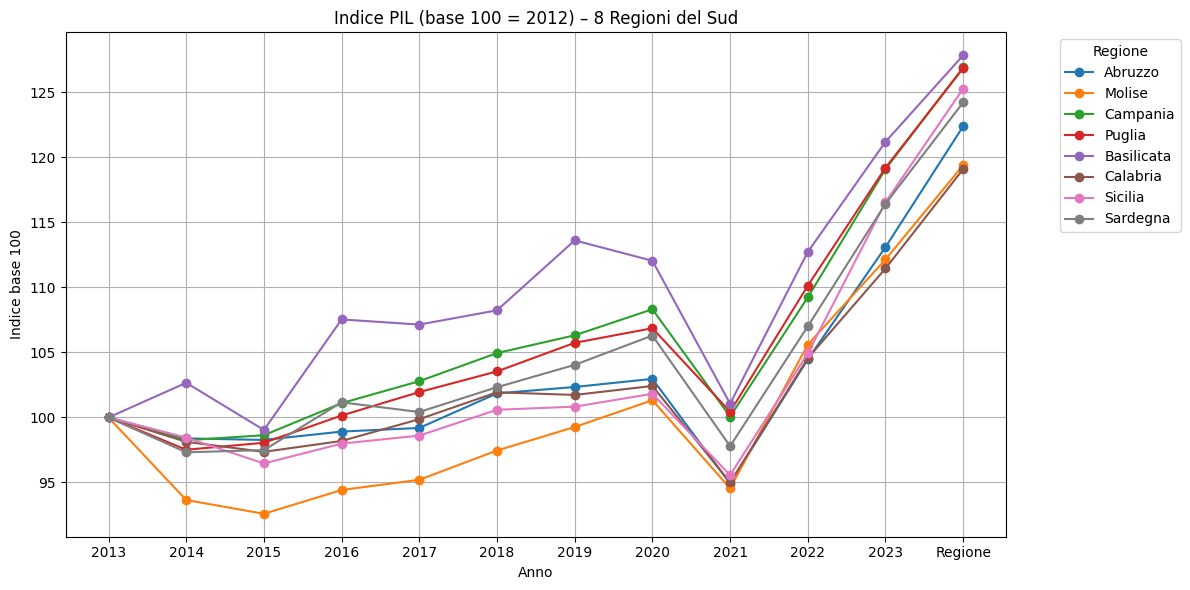

In [46]:
import matplotlib.pyplot as plt

# === Dizionario codici NUTS2 → nomi regioni
nuts2_nomi = {
    'ITF1': 'Abruzzo',
    'ITF2': 'Molise',
    'ITF3': 'Campania',
    'ITF4': 'Puglia',
    'ITF5': 'Basilicata',
    'ITF6': 'Calabria',
    'ITG1': 'Sicilia',
    'ITG2': 'Sardegna'
}

# === Aggiungi nomi delle regioni
df_sud_idx['Regione'] = df_sud_idx.index.map(nuts2_nomi)

# === Traccia grafico con etichette leggibili
plt.figure(figsize=(12, 6))
for codice in df_sud_idx.index:
    nome = nuts2_nomi.get(codice, codice)
    plt.plot(
        df_sud_idx.columns[1:],   # salta 'Regione'
        df_sud_idx.loc[codice].drop('Regione'),
        marker='o',
        label=nome
    )

plt.title("Indice PIL (base 100 = 2012) – 8 Regioni del Sud")
plt.xlabel("Anno")
plt.ylabel("Indice base 100")
plt.grid(True)
plt.legend(title="Regione", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


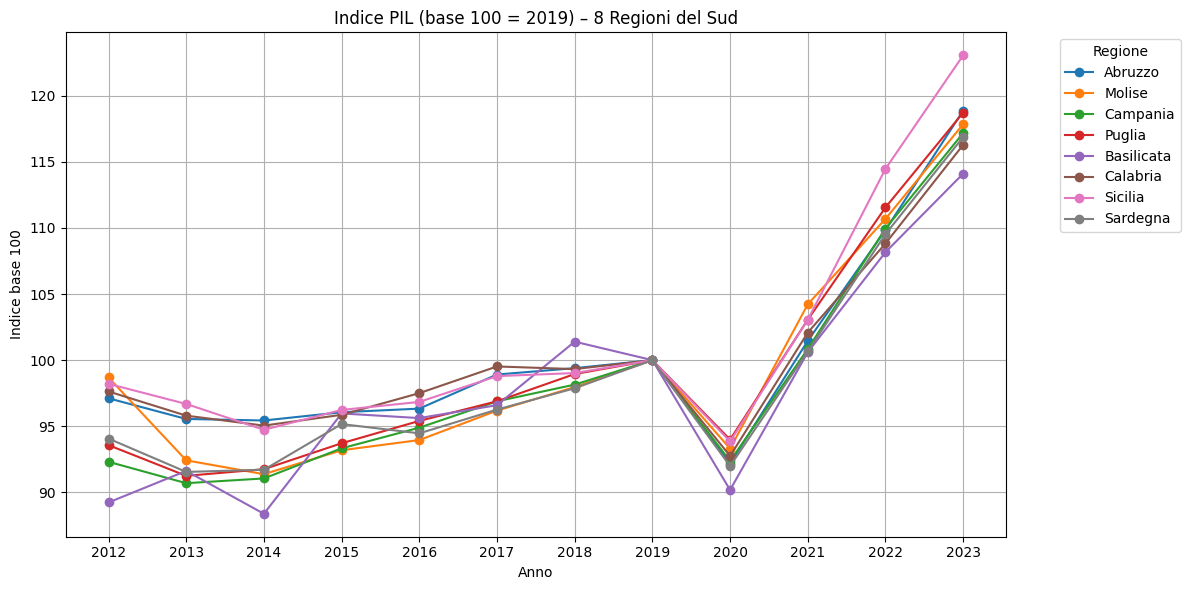

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# === NUTS2 → Nome regione
nuts2_nomi = {
    'ITF1': 'Abruzzo',
    'ITF2': 'Molise',
    'ITF3': 'Campania',
    'ITF4': 'Puglia',
    'ITF5': 'Basilicata',
    'ITF6': 'Calabria',
    'ITG1': 'Sicilia',
    'ITG2': 'Sardegna'
}

# === Forza colonne a stringa
df_pivot.columns = df_pivot.columns.astype(str)

# === Seleziona anni
col_anni = [col for col in df_pivot.columns if col.isnumeric()]

# === Estrai dati PIL per le 8 regioni del Sud
sud_8 = list(nuts2_nomi.keys())
df_sud = df_pivot.loc[sud_8, col_anni].astype(float)

# === Calcola indice base 100 (base = 2019)
df_sud_idx = df_sud.div(df_sud['2019'], axis=0) * 100

# === Aggiungi nomi delle regioni
df_sud_idx['Regione'] = df_sud_idx.index.map(nuts2_nomi)
df_sud_idx = df_sud_idx[['Regione'] + [col for col in df_sud_idx.columns if col != 'Regione']]

# === Plot aggiornato
plt.figure(figsize=(12, 6))
for codice in df_sud_idx.index:
    nome = df_sud_idx.loc[codice, 'Regione']
    plt.plot(
        [col for col in df_sud_idx.columns if col != 'Regione'],
        df_sud_idx.loc[codice].drop('Regione'),
        marker='o',
        label=nome
    )

plt.title("Indice PIL (base 100 = 2019) – 8 Regioni del Sud")
plt.xlabel("Anno")
plt.ylabel("Indice base 100")
plt.grid(True)
plt.legend(title="Regione", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Lo script è stato aggiornato per mostrare:

l’evoluzione anno per anno del PIL pro capite per Centro-Nord e Sud,

la differenza tra i due in un grafico (Gap_%),

l’andamento della convergenza/divergenza dal 2019 al 2023.

📈 Ora puoi vedere se il Mezzogiorno sta migliorando rispetto al Centro-Nord in termini relativi.

             Centro_Nord  Sud_Isole  CentroNord_IDX  Sud_IDX  Gap_%
TIME_PERIOD                                                        
2019                0.02       0.01          100.00   100.00   0.00
2020                0.02       0.01           93.05    93.53   0.48
2021                0.02       0.01          104.87   103.79  -1.08
2022                0.02       0.01          113.35   113.25  -0.10
2023                0.02       0.01          121.10   121.52   0.42


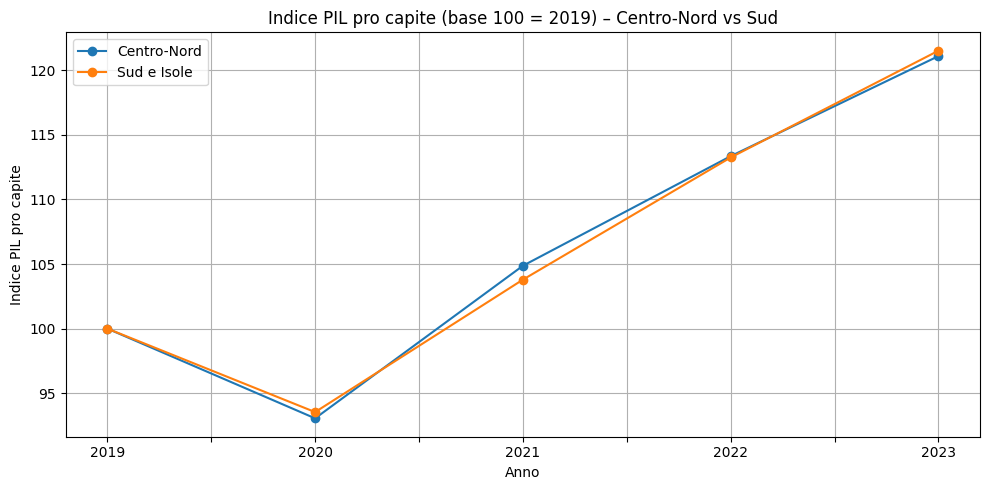

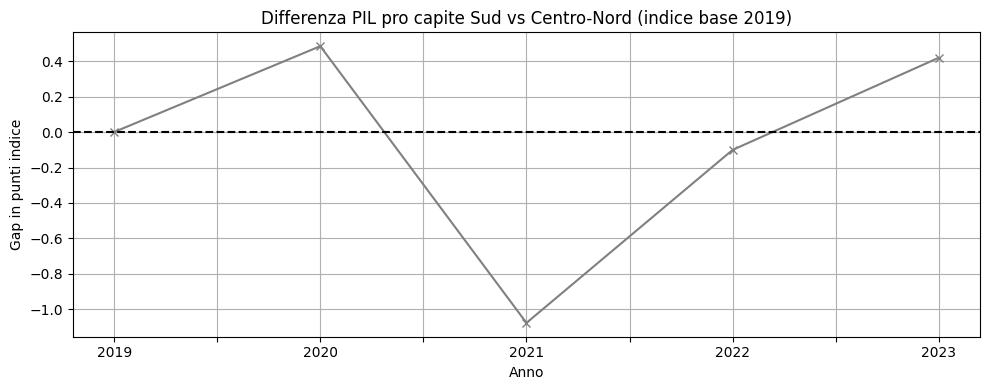

In [77]:
import pandas as pd
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# === STEP 1: Scarica popolazione NUTS2 ITALIA da Eurostat (dataset demo_r_pjanaggr3) ===
pop_url = "https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/demo_r_pjanaggr3?format=SDMX-CSV&compressed=true"
r = requests.get(pop_url)
r.raise_for_status()

# === STEP 2: Leggi il file .csv.gz da memoria
df_pop = pd.read_csv(BytesIO(r.content), compression='gzip')

# === STEP 3: Filtra solo Italia, popolazione al 1° gennaio (unit = NR, sex = T, age = TOTAL)
df_pop = df_pop[
    (df_pop['geo'].str.startswith('IT')) &
    (df_pop['unit'] == 'NR') &
    (df_pop['sex'] == 'T') &
    (df_pop['age'] == 'TOTAL')
]

# === STEP 4: Pivot e gestione colonne
df_pop['TIME_PERIOD'] = df_pop['TIME_PERIOD'].astype(str)
df_pop_wide = df_pop.pivot(index='geo', columns='TIME_PERIOD', values='OBS_VALUE')
df_pop_wide.columns = df_pop_wide.columns.astype(str)

# Anni target e validazione
anni_target = ['2019', '2020', '2021', '2022', '2023']
anni_presenti = [a for a in anni_target if a in df_pop_wide.columns]
if len(anni_presenti) < len(anni_target):
    print("⚠️ Attenzione: anni mancanti nel dataset popolazione:", set(anni_target) - set(anni_presenti))

df_pop_wide = df_pop_wide[anni_presenti].astype(float)

# === STEP 5: Definisci le macroaree
nord_centro_prefix = ('ITC1', 'ITC2', 'ITC3', 'ITC4')
sud_isole_prefix = ('ITF1', 'ITF2', 'ITF3', 'ITF4', 'ITF5', 'ITF6', 'ITG1', 'ITG2')

# === STEP 6: Somma popolazione per macroarea
pop_cn = df_pop_wide[df_pop_wide.index.str.startswith(nord_centro_prefix)].sum()
pop_sud = df_pop_wide[df_pop_wide.index.str.startswith(sud_isole_prefix)].sum()

# === STEP 7: Calcola PIL totale per macroarea (df_pivot deve esistere già)
df_pivot.columns = df_pivot.columns.astype(str)
col_anni = anni_presenti

pil_cn = df_pivot[df_pivot.index.str.startswith(nord_centro_prefix)][col_anni].astype(float).sum()
pil_sud = df_pivot[df_pivot.index.str.startswith(sud_isole_prefix)][col_anni].astype(float).sum()

# === STEP 8: Calcola PIL pro capite
gdp_capita = pd.DataFrame({
    'Centro_Nord': pil_cn / pop_cn,
    'Sud_Isole': pil_sud / pop_sud
})

# === STEP 9: Calcola indice base 100 (base 2019)
base_2019 = gdp_capita.loc['2019']
gdp_capita['CentroNord_IDX'] = gdp_capita['Centro_Nord'] / base_2019['Centro_Nord'] * 100
gdp_capita['Sud_IDX'] = gdp_capita['Sud_Isole'] / base_2019['Sud_Isole'] * 100

# === STEP 10: Calcola differenza percentuale tra Sud e Centro-Nord per ogni anno
gdp_capita['Gap_%'] = (gdp_capita['Sud_IDX'] - gdp_capita['CentroNord_IDX'])

# === STEP 11: Output
print(gdp_capita.round(2))

# === STEP 12: Grafico
gdp_capita[['CentroNord_IDX', 'Sud_IDX']].plot(marker='o', figsize=(10, 5))
plt.title("Indice PIL pro capite (base 100 = 2019) – Centro-Nord vs Sud")
plt.ylabel("Indice PIL pro capite")
plt.xlabel("Anno")
plt.grid(True)
plt.legend(["Centro-Nord", "Sud e Isole"])
plt.tight_layout()
plt.show()

# === STEP 13: Grafico differenziale tra Sud e Centro-Nord
gdp_capita['Gap_%'].plot(marker='x', figsize=(10, 4), color='gray')
plt.axhline(0, linestyle='--', color='black')
plt.title("Differenza PIL pro capite Sud vs Centro-Nord (indice base 2019)")
plt.ylabel("Gap in punti indice")
plt.xlabel("Anno")
plt.grid(True)
plt.tight_layout()
plt.show()

# === STEP 14: (Facoltativo) Salva in CSV
gdp_capita.round(2).to_csv("indice_pil_pro_capite_macroaree_2019_2023.csv", index_label='Anno')
